
Model Performance (R² Score on Train and Test Sets):
| Model | Train R² | Test R² |
--------------------------------------------------
| Linear | -1.7706 | 0.4770 |
| Polynomial | 0.9022 | 0.8822 |
--------------------------------------------------

Final Model Comparison (R² Score on TEST Data):
----------------------------------------
| Model | Test R² |
----------------------------------------
| Linear | 0.4770 |
| Polynomial | 0.8822 |
| Ridge (alpha=1.0) | 0.8818 |
| Lasso (alpha=0.1) | 0.8820 |
----------------------------------------


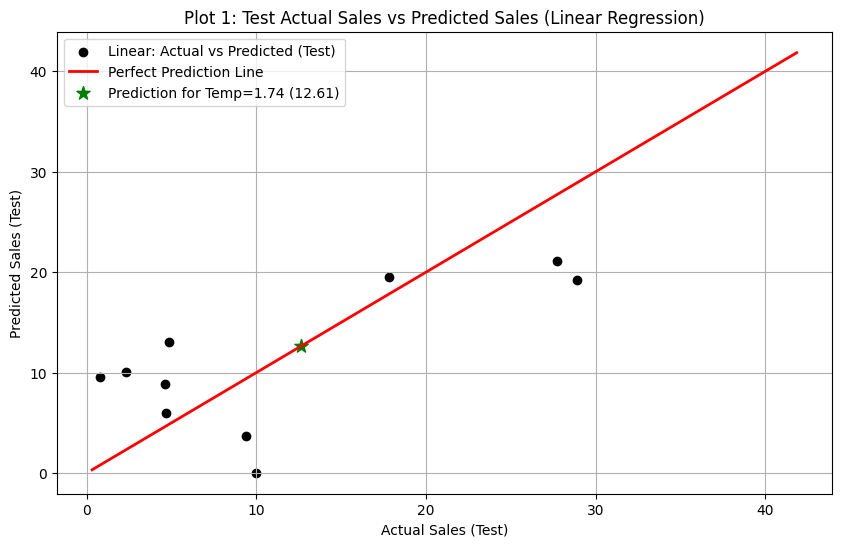

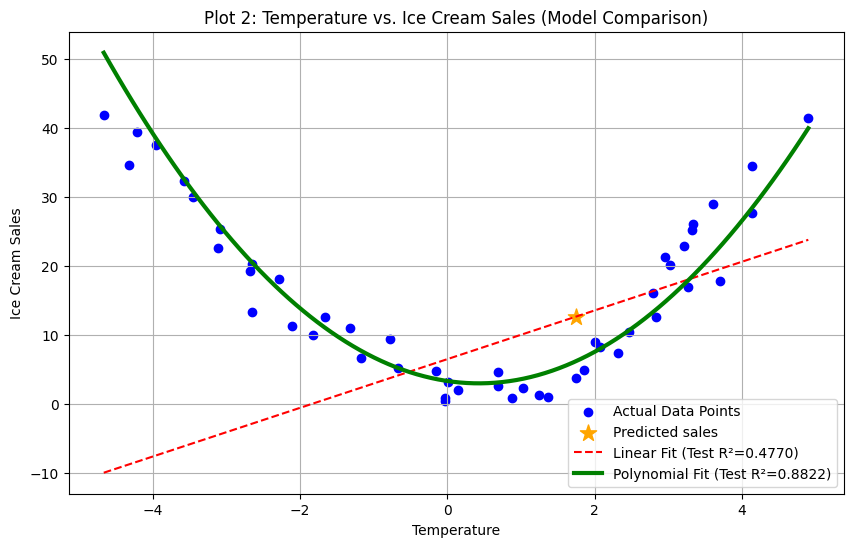

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

file_path = "C:/Users/Rajal/Downloads/ice_cream_data_sell.csv"
df = pd.read_csv(file_path)

X = df[['Temperature']].values
y = df[['Ice Cream Sales']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train) # using the full dataset for testing overfit errors
model.fit(X_test, y_test)  
r2_linear_train = r2_score(y_train, model.predict(X_train))
r2_linear_test = r2_score(y_test, model.predict(X_test))

# Polynomial Regression 
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
poly_model.fit(X_test_poly, y_test)
r2_poly_train = r2_score(y_train, poly_model.predict(X_train_poly))
r2_poly_test = r2_score(y_test, poly_model.predict(X_test_poly))

# Ridge Regression (Regularization) 
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train_poly, y_train) 
ridge_model.fit(X_test_poly, y_test)
r2_ridge_train = r2_score(y_train, ridge_model.predict(X_train_poly))
r2_ridge_test = r2_score(y_test, ridge_model.predict(X_test_poly))

# Lasso Regression (Regularization) 
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(X_train_poly, y_train)
lasso_model.fit(X_test_poly, y_test)
r2_lasso_train = r2_score(y_train, lasso_model.predict(X_train_poly))
r2_lasso_test = r2_score(y_test, lasso_model.predict(X_test_poly))

print("\nModel Performance (R² Score on Train and Test Sets):")
print(f"| Model | Train R² | Test R² |")
print("-" * 50)
print(f"| Linear | {r2_linear_train:.4f} | {r2_linear_test:.4f} |")
print(f"| Polynomial | {r2_poly_train:.4f} | {r2_poly_test:.4f} |")
print("-" * 50)

print("\nFinal Model Comparison (R² Score on TEST Data):")
print("-" * 40)
print(f"| Model | Test R² |")
print("-" * 40)
print(f"| Linear | {r2_linear_test:.4f} |")
print(f"| Polynomial | {r2_poly_test:.4f} |")
print(f"| Ridge (alpha=1.0) | {r2_ridge_test:.4f} |")
print(f"| Lasso (alpha=0.1) | {r2_lasso_test:.4f} |")
print("-" * 40)


# 1. Prediction Example for plot 1
new_temp = np.array([[1.74]])
predicted_sales_linear = model.predict(new_temp)[0][0]
predicted_sales_poly = poly_model.predict(poly.transform(new_temp))[0][0]

# PLOT 1: Actual vs Predicted (Linear) 
plt.figure(figsize=(10,6))
plt.scatter(y_test, model.predict(X_test), color='black', label='Linear: Actual vs Predicted (Test)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r', lw=2, label='Perfect Prediction Line')
plt.scatter(predicted_sales_linear, predicted_sales_linear, color='green', marker='*', s=100, label=f'Prediction for Temp=1.74 ({predicted_sales_linear:.2f})')
plt.title('Plot 1: Test Actual Sales vs Predicted Sales (Linear Regression)')
plt.xlabel('Actual Sales (Test)')
plt.ylabel('Predicted Sales (Test)')
plt.legend()
plt.grid(True)
plt.show()

# --- PLOT 2: Temperature vs Sales (Showing the Polynomial Curve) ---
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_pred_linear_range = model.predict(X_range)
y_pred_poly_range = poly_model.predict(X_range_poly)

plt.figure(figsize=(10,6))
plt.scatter(X, y, color='blue', label='Actual Data Points')
plt.scatter(new_temp, predicted_sales_linear, color='orange', marker='*', s=150, label='Predicted sales')
plt.plot(X_range, y_pred_linear_range, color='red', linestyle='--', label=f'Linear Fit (Test R²={r2_linear_test:.4f})')
plt.plot(X_range, y_pred_poly_range, color='green', lw=3, label=f'Polynomial Fit (Test R²={r2_poly_test:.4f})')
plt.title('Plot 2: Temperature vs. Ice Cream Sales (Model Comparison)')
plt.xlabel('Temperature')
plt.ylabel('Ice Cream Sales')
plt.legend()
plt.grid(True)
plt.show()